<div style="border:solid purple 2px; padding: 20px">
    
Виктория привет! 👋
    
Меня зовут Рустам Муртазин, и я буду делать ревью проектной работы по статистическому анализу данных. Давай будем общаться на **«ты»**. Если это неприемлемо, обязательно напиши мне в комментариях — мы перейдем на **«вы»**.

Цель моей работы — не указать на ошибки, а поделиться опытом, и постаратья сделать проект еще лучше, чтобы повалить своим решением всех работодателей 😁 Комментарии в работе позволят тебе расставить приоритеты.   

Обрати внимание в первую очередь на те, что помечаны <span style="color:red">красным цветом</span>. После их доработки проект будет принят. <span style="color:green">Зеленым цветом</span> отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. <span style="color:orange">Оранжевым цветом</span> выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: если ты **что-то меняешь** в проекте по моим рекомендациям — **пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее».

Мне понравился твой проект, однако местами его нужно чуть доработать, я оставил комментарии тебе в помощь. После того, как ты все доработаешь, я смогу принять твой проект!) В конце есть чек-лист😉

</div>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 </h2>

Спасибо, за быструю и качественную доработку комментариев! Все моменты были исправлены, так что работу я принимаю. Ты большая молодец, что исправила все комментарии (и оранжевые тоже). Приятно быть полезным)
    
В общем получилась классная работа. Благодарю за старания и интерес и желаю успехов в дальнейших проектах 😊

</div>

# Определение перспективного тарифа для телеком компании

Компании «Мегалайн» — федеральный оператор сотовой связи. 

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 

Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше. 

*Цель работы* - проанализировать поведение клиентов, проверить гипотизы и сделать вывод какой тариф приносит компании больше прибыли.

Работать будем с выгрузками данных calls.csv, internet.csv, messages.csv, tariffs.csv, users.csv.

### Содержание работы:
1. [Шаг 1. Изучение данных](#p1)
2. [Шаг 2. Подготовка данных](#p2)   
3. [Шаг 3. Анализ данных](#p3) 
4. [Шаг 4. Проверка гипотиз](#p4) 
4. [Шаг 5. Общий вывод исследования](#p5)     
    

**!Буду благодарна за любую критику и предложения по улучшению проекта!**

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Отличное оформление вводной части, удобная навигация по проекту, молодец.

</div>

### Шаг 1. Изучение данных <a name="p1"></a>

Подключаем библиотеки.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

Загружаем файл с данными по звонкам.

In [64]:
calls = pd.read_csv('/datasets/calls.csv')
calls.head(5)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


Проверим данные по таблице.

In [65]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Загружаем файл с данными по расходу интернет-траффика.

In [66]:
web = pd.read_csv('/datasets/internet.csv')
web.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


Проверим данные по таблице.

In [67]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


Загружаем файл с данными по расходу смс.

In [68]:
sms = pd.read_csv('/datasets/messages.csv')
sms.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


Проверим данные по таблице.

In [69]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Загружаем файл с данными по тарифам.

In [70]:
tarif = pd.read_csv('/datasets/tariffs.csv')
tarif.head(5)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


Проверим данные по таблице.

In [71]:
tarif.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


Загружаем файл с данными о пользователях.

In [72]:
user = pd.read_csv('/datasets/users.csv')
user.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


Проверим данные по таблице.

In [73]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


Таким образом, мы загрузили 5 датасетов по 500 пользователям оператора "Мегалайн", их звонкам, тратам Мб траффика и СМС.

### Шаг 2. Подготовка данных <a name="p2"></a>

На первом шаге, визуально были обнаружены звонки с длительностью 0.0 минут. Рассмотрим их подробнее.

In [74]:
calls.query('duration == "0.0" ')

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
5,1000_5,2018-11-02,0.0,1000
6,1000_6,2018-10-18,0.0,1000
9,1000_9,2018-08-15,0.0,1000
...,...,...,...,...
202590,1499_203,2018-12-03,0.0,1499
202592,1499_205,2018-10-13,0.0,1499
202593,1499_206,2018-12-26,0.0,1499
202594,1499_207,2018-10-28,0.0,1499


39613 звонков. Предположим, что это пропущенные звонки или исходящие звонки без ответа. На первый взгляд можно было бы их отбросить, но нам кажется, что это несовсем корректно. Ведь во-первых, это реальные данные, которые имеют место быть. А во-вторых, в дальнейшем, от нас требуется агрегировать звонки помесячно, так что в сумме длительности звонков они не окажут сильного влияния, но будут учтены в количестве, что тоже верно.

<font color=blue>И, конечно, нужно задать вопрос разработчикам)</font>

<div class = "alert alert-warning">
<h2> Комментарии ревьюера </h2>

Логичная аргументация 👍 В реальном бизнесе, я думаю ты согласишься, что нужно задать вопрос разработчикам про такие данные

</div>

<font color=blue>По условию задачи нужно откруглить длительность звонков до минут в большую сторону.</font>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 </h2>

Супер, отличная работа!

</div>

In [75]:
calls['duration'] = calls['duration'].apply(np.ceil) 
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.0,1000
1,1000_1,2018-08-17,0.0,1000
2,1000_2,2018-06-11,3.0,1000
3,1000_3,2018-09-21,14.0,1000
4,1000_4,2018-12-15,6.0,1000


Был замечен некорректный тип данных у поля Дата. Поменяем тип данных у даты звонка с `object` на `date`.

In [76]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
calls['call_date'].head()

0   2018-07-25
1   2018-08-17
2   2018-06-11
3   2018-09-21
4   2018-12-15
Name: call_date, dtype: datetime64[ns]

Добавим столбец месяц к таблице.

In [77]:
calls['month'] = calls['call_date'].values.astype('datetime64[M]')
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,2018-07-01
1,1000_1,2018-08-17,0.0,1000,2018-08-01
2,1000_2,2018-06-11,3.0,1000,2018-06-01
3,1000_3,2018-09-21,14.0,1000,2018-09-01
4,1000_4,2018-12-15,6.0,1000,2018-12-01


Сгруппируем данные помесячно и посчитаем количество звонков и их длительность по каждому пользователю.

In [78]:
calls_month = calls.groupby(['user_id','month'])[['duration']].agg(['count','sum']).reset_index()
calls_month.head(10)

user_id      month duration       
                        count    sum
0    1000 2018-05-01       22  159.0
1    1000 2018-06-01       43  172.0
2    1000 2018-07-01       47  340.0
3    1000 2018-08-01       52  408.0
4    1000 2018-09-01       58  466.0
5    1000 2018-10-01       57  350.0
6    1000 2018-11-01       43  338.0
7    1000 2018-12-01       46  333.0
8    1001 2018-11-01       59  430.0
9    1001 2018-12-01       63  414.0

-----------------------------------------
Поменяем тип поля у даты смс с `object` на `date`.

In [79]:
sms['message_date'] = pd.to_datetime(sms['message_date'])
sms['message_date'].head()

0   2018-06-27
1   2018-10-08
2   2018-08-04
3   2018-06-16
4   2018-12-05
Name: message_date, dtype: datetime64[ns]

Добавим столбец месяц к таблице.

In [80]:
sms['month'] = sms['message_date'].values.astype('datetime64[M]')
sms.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,2018-06-01
1,1000_1,2018-10-08,1000,2018-10-01
2,1000_2,2018-08-04,1000,2018-08-01
3,1000_3,2018-06-16,1000,2018-06-01
4,1000_4,2018-12-05,1000,2018-12-01


Сгруппируем данные помесячно и посчитаем количество отправленных смс по каждому пользователю.

In [81]:
sms_month = sms.groupby(['user_id','month'])['id'].agg(['count']).reset_index()
sms_month.head(10)

,user_id,month,count
0,1000,2018-05-01,22
1,1000,2018-06-01,60
2,1000,2018-07-01,75
3,1000,2018-08-01,81
4,1000,2018-09-01,57
5,1000,2018-10-01,73
6,1000,2018-11-01,58
7,1000,2018-12-01,70
8,1002,2018-06-01,4
9,1002,2018-07-01,11


Поменяем формат у даты смс с `object` на `date`.

In [82]:
web['session_date'] = pd.to_datetime(web['session_date'])
web['session_date'].head()

0   2018-11-25
1   2018-09-07
2   2018-06-25
3   2018-08-22
4   2018-09-24
Name: session_date, dtype: datetime64[ns]

Добавим столбец месяц к таблице.

In [83]:
web['month'] = web['session_date'].values.astype('datetime64[M]')
web.head()

,Unnamed: 0,id,mb_used,session_date,user_id,month
0,0,1000_0,112.95,2018-11-25,1000,2018-11-01
1,1,1000_1,1052.81,2018-09-07,1000,2018-09-01
2,2,1000_2,1197.26,2018-06-25,1000,2018-06-01
3,3,1000_3,550.27,2018-08-22,1000,2018-08-01
4,4,1000_4,302.56,2018-09-24,1000,2018-09-01


Сгруппируем данные помесячно и посчитаем количество использованных Мб по каждому пользователю.

In [84]:
web_month = web.groupby(['user_id','month'])['mb_used'].agg(['count','sum']).reset_index()
web_month.head()

,user_id,month,count,sum
0,1000,2018-05-01,5,2253.49
1,1000,2018-06-01,49,23233.77
2,1000,2018-07-01,29,14003.64
3,1000,2018-08-01,29,14055.93
4,1000,2018-09-01,27,14568.91


<font color=blue>По условию задачи нужно откруглить количество использованных Мб в большую сторону до гигабайтов. Создадим новую переменную</font>

In [85]:
web_month['gb'] = web_month['sum'] / 1024 
web_month['gb_used'] = web_month['gb'].apply(np.ceil)
web_month.head()

,user_id,month,count,sum,gb,gb_used
0,1000,2018-05-01,5,2253.49,2.200674,3.0
1,1000,2018-06-01,49,23233.77,22.689229,23.0
2,1000,2018-07-01,29,14003.64,13.675430,14.0
3,1000,2018-08-01,29,14055.93,13.726494,14.0
4,1000,2018-09-01,27,14568.91,14.227451,15.0


<font color=blue>Отлично, удалим ненужные столбцы.</font>

In [86]:
web_month.drop(['sum', 'gb'], axis='columns', inplace=True)

Сольем все данные по расходам пакетов минут, Мб и смс по каждому пользователю помесячно в единую таблицу.

In [87]:
df = web_month.merge(calls_month,how='outer',on=['user_id','month'])

<font color=blue>Вроде исчезло)</font>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 </h2>

Класс 😊

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

При выполнении кода выше выходит предупреждение `UserWarning`, подсвеченное розовым цветом (а значит, оно важно для качества кода). Оно выходит так как при объединении данных один из датафреймов имеет мультииндексацию. Решить проблему позволит сбрасывание индексов датафрейма, можно использовать [reset_index](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)
    
</div>

In [88]:
df = df.merge(sms_month,how='outer',on=['user_id','month'])

Получили таблицу такого вида.

In [89]:
df

,user_id,month,count_x,gb_used,"(duration, count)","(duration, sum)",count_y
0,1000,2018-05-01,5.0,3.0,22.0,159.0,22.0
1,1000,2018-06-01,49.0,23.0,43.0,172.0,60.0
2,1000,2018-07-01,29.0,14.0,47.0,340.0,75.0
3,1000,2018-08-01,29.0,14.0,52.0,408.0,81.0
4,1000,2018-09-01,27.0,15.0,58.0,466.0,57.0
...,...,...,...,...,...,...,...
3209,1273,2018-11-01,NaN,NaN,45.0,272.0,29.0
3210,1273,2018-12-01,NaN,NaN,41.0,260.0,39.0
3211,1377,2018-02-01,NaN,NaN,23.0,179.0,2.0
3212,1392,2018-02-01,NaN,NaN,2.0,13.0,3.0


Переименуем названия столбцов.

In [90]:
df.columns = ['user_id','month','gb_count','gb_sum','calls_count','calls_dur_sum','sms_count']
df

,user_id,month,gb_count,gb_sum,calls_count,calls_dur_sum,sms_count
0,1000,2018-05-01,5.0,3.0,22.0,159.0,22.0
1,1000,2018-06-01,49.0,23.0,43.0,172.0,60.0
2,1000,2018-07-01,29.0,14.0,47.0,340.0,75.0
3,1000,2018-08-01,29.0,14.0,52.0,408.0,81.0
4,1000,2018-09-01,27.0,15.0,58.0,466.0,57.0
...,...,...,...,...,...,...,...
3209,1273,2018-11-01,NaN,NaN,45.0,272.0,29.0
3210,1273,2018-12-01,NaN,NaN,41.0,260.0,39.0
3211,1377,2018-02-01,NaN,NaN,23.0,179.0,2.0
3212,1392,2018-02-01,NaN,NaN,2.0,13.0,3.0


Добавим данные о пользователях.

In [91]:
df = df.merge(user,how='left',on=['user_id'])

Добавим информацию о тарифах (перед этим изменим название столбца).

In [92]:
tarif.rename(columns={'tariff_name': 'tariff'}, inplace=True)
df = df.merge(tarif,how='left',on=['tariff'])
df

,user_id,month,gb_count,gb_sum,calls_count,calls_dur_sum,sms_count,age,churn_date,city,...,last_name,reg_date,tariff,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,2018-05-01,5.0,3.0,22.0,159.0,22.0,52,NaN,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,2018-06-01,49.0,23.0,43.0,172.0,60.0,52,NaN,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,2018-07-01,29.0,14.0,47.0,340.0,75.0,52,NaN,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,2018-08-01,29.0,14.0,52.0,408.0,81.0,52,NaN,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,2018-09-01,27.0,15.0,58.0,466.0,57.0,52,NaN,Краснодар,...,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3209,1273,2018-11-01,NaN,NaN,45.0,272.0,29.0,46,NaN,Курган,...,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
3210,1273,2018-12-01,NaN,NaN,41.0,260.0,39.0,46,NaN,Курган,...,Корнилов,2018-05-15,ultra,1000,30720,3000,1950,150,1,1
3211,1377,2018-02-01,NaN,NaN,23.0,179.0,2.0,59,NaN,Брянск,...,Семин,2018-02-25,ultra,1000,30720,3000,1950,150,1,1
3212,1392,2018-02-01,NaN,NaN,2.0,13.0,3.0,54,2018-09-27,Челябинск,...,Беликова,2018-02-27,ultra,1000,30720,3000,1950,150,1,1


Проверим контрольные суммы после слияния таблиц.

In [93]:
calls['duration'].sum()

1450301.0

In [94]:
df['calls_dur_sum'].sum()

1450301.0

In [95]:
web_month['gb_used'].sum()

55599.0

In [96]:
df['gb_sum'].sum()

55599.0

Все сходится, значит слияние прошло корректно. Ура!

<div class = "alert alert-success">
<h2> Комментарии ревьюера </h2>

Класс, молодец, что проверяешь корректность объединения

</div>

Рассчитаем перерасход по пакетам минут, Мб и СМС от количества, включенного в тариф.

In [97]:
df['min_over'] =  df['calls_dur_sum'] - df['minutes_included'] 
df['gb_over'] =  df['gb_sum'] - df['mb_per_month_included'] / 1024
df['sms_over'] =  df['sms_count'] - df['messages_included'] 

df['gb_per_month_included'] = df['mb_per_month_included'] / 1024

Напишем функцию, рассчитывающую траты сверх тарифа по пакетам.

In [98]:
def get_revenue(row):
    revenue_by_min = 0
    revenue_by_messages = 0
    revenue_mb = 0
    if row['min_over'] > 0:
        revenue_by_min = row['min_over'] * row['rub_per_minute']
    if row['sms_over'] > 0:
        revenue_by_messages = row['sms_over'] * row['rub_per_message']
    if row['gb_over'] > 0:
        revenue_mb = (row['gb_over']) * row['rub_per_gb']
    return revenue_by_min + revenue_by_messages + revenue_mb

<font color=blue>Добавила переменные с округленными минутами и Гб выше ;) </font>

<div class="alert alert-danger">
<h2> Комментарий ревьюера</h2>

Хорошая функци Виктория, здесь несколько важных моментов:
    
- в описании проекта было указано, что компания считает полные минуты разговора. Т.е если пользователь проговорит 5 минут и 3 секунды, то компания засчитает ему 6 минут разговора. Поэтому перед созданием сводных таблиц следует провести округление длительности разговоров в большую сторону. То же самое и с интернетом.
    
- когда пользователь начал использовать тариф сверх лимита, то ему придеться уже заплатить за целый Гб. Даже если он использует 10 Мб, он всё равно оплатит целиком Гб. Поэтому интернет сверх тарифа нужно округлить в целые Гб, причем в большую сторону

</div>

Применим функцию ко всем строкам и получим траты по пакетам сверх абонентской платы.

In [99]:
df['revenue_add'] = df.apply(get_revenue, axis=1)

Суммируем траты по пакетам с абонентской платой и получим общий помесячный доход от каждого пользователя.

In [100]:
df['revenue_all'] = df['revenue_add'] + df['rub_monthly_fee']

In [101]:
df[df['revenue_add'] > 0]

,user_id,month,gb_count,gb_sum,calls_count,calls_dur_sum,sms_count,age,churn_date,city,...,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,min_over,gb_over,sms_over,gb_per_month_included,revenue_add,revenue_all
8,1001,2018-11-01,55.0,18.0,59.0,430.0,NaN,41,NaN,Москва,...,550,200,3,3,-70.0,3.0,NaN,15.0,600.0,1150.0
11,1002,2018-07-01,58.0,18.0,26.0,214.0,11.0,59,NaN,Стерлитамак,...,550,200,3,3,-286.0,3.0,-39.0,15.0,600.0,1150.0
12,1002,2018-08-01,60.0,20.0,42.0,289.0,13.0,59,NaN,Стерлитамак,...,550,200,3,3,-211.0,5.0,-37.0,15.0,1000.0,1550.0
13,1002,2018-09-01,56.0,17.0,36.0,206.0,4.0,59,NaN,Стерлитамак,...,550,200,3,3,-294.0,2.0,-46.0,15.0,400.0,950.0
15,1002,2018-11-01,55.0,19.0,32.0,243.0,16.0,59,NaN,Стерлитамак,...,550,200,3,3,-257.0,4.0,-34.0,15.0,800.0,1350.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3197,1498,2018-09-01,78.0,22.0,59.0,471.0,44.0,68,2018-10-25,Владикавказ,...,550,200,3,3,-29.0,7.0,-6.0,15.0,1400.0,1950.0
3198,1498,2018-10-01,59.0,21.0,41.0,247.0,42.0,68,2018-10-25,Владикавказ,...,550,200,3,3,-253.0,6.0,-8.0,15.0,1200.0,1750.0
3200,1499,2018-10-01,58.0,18.0,68.0,449.0,48.0,35,NaN,Пермь,...,550,200,3,3,-51.0,3.0,-2.0,15.0,600.0,1150.0
3201,1499,2018-11-01,49.0,18.0,74.0,612.0,59.0,35,NaN,Пермь,...,550,200,3,3,112.0,3.0,9.0,15.0,963.0,1513.0


Таким образом, мы объединили данные в одну таблицу помесячно по пользователям для дальнейшего анализа и рассчитали помесячный доход с каждого пользователя.

Видно, что не все пользователи пользуются интернетом или смс, и не все превышают лимиты включенных в тариф услуг, но это вполне нормально.

### Шаг 3. Анализ данных <a name="p3"></a>

Посчитаем среднее количество звонков, их длительность, количество смс и потраченных Мб по тарифам.

In [102]:
df.pivot_table(index='tariff', values=('calls_count','calls_dur_sum','sms_count','gb_sum'), aggfunc='mean')

,calls_count,calls_dur_sum,gb_sum,sms_count
tariff,,,,
smart,58.621233,419.062978,16.336176,38.716441
ultra,76.016824,545.451104,19.694359,61.161006


Вполне логично, что пользователи тарифа ultra пользуются услугами активнее. 

Нарисуем графики по всем параметрам.

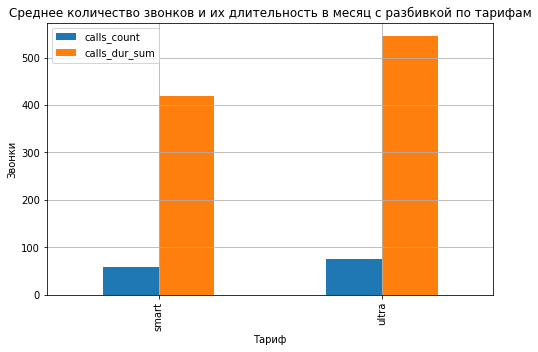

In [103]:
(df      .pivot_table(index='tariff', values=('calls_count','calls_dur_sum'), aggfunc='mean')
         .plot(kind='bar',grid=True, figsize=(8, 5), 
               title='Среднее количество звонков и их длительность в месяц с разбивкой по тарифам')
);
plt.xlabel('Тариф');
plt.ylabel('Звонки');

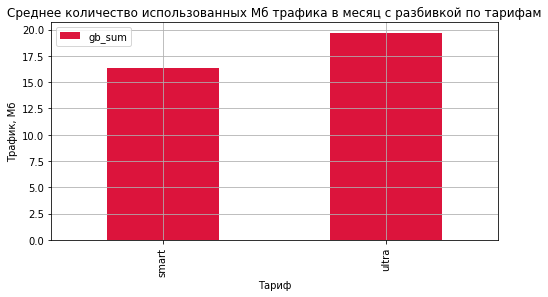

In [104]:
(df      .pivot_table(index='tariff', values=('gb_sum'), aggfunc='mean')
         .plot(kind='bar',grid=True, figsize=(8, 4), color='#DC143C', 
               title='Среднее количество использованных Мб трафика в месяц с разбивкой по тарифам')
);
plt.xlabel('Тариф');
plt.ylabel('Трафик, Мб');

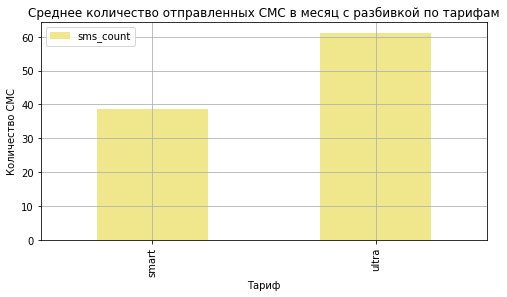

In [105]:
(df      .pivot_table(index='tariff', values=('sms_count'), aggfunc='mean')
         .plot(kind='bar',grid=True, figsize=(8, 4), color='#F0E68C', 
               title='Среднее количество отправленных СМС в месяц с разбивкой по тарифам')
);
plt.xlabel('Тариф');
plt.ylabel('Количество СМС');

По графикам разница в использовании услуг наглядна.

Создадим срезы данных по тарифам.

In [106]:
ultra = df.query('tariff == "ultra"')
smart = df.query('tariff == "smart"')

Напишем функцию для просчета дисперсии и стандартного отклонения по трем показателям.

In [107]:
def var_dev(data):
    d = {'calls_dur_sum': 'минут','gb_sum':'Гб','sms_count':'СМС'}
    for key, value in d.items():
        var = np.var(data[key], ddof=1)
        st_dev = np.std(data[key], ddof=1)

        print('Дисперсия расхода', value, var.round(2))
        print('Стандартное отклонение расхода', value,st_dev.round(2))

<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Супер функция и молодец, что ставишь `ddof = 1`. Очень правильное решение

</div>

Запустим просчет по общей выборке пользователей и отдельно по тарифам.

In [108]:
print('========== по всей выборке ========= ')
var_dev(df)
print('========== по тарифу ultra ========= ')
var_dev(ultra)
print('========== по тарифу smart ========= ')
var_dev(smart)

========== по всей выборке ========= 
Дисперсия расхода минут 56658.89
Стандартное отклонение расхода минут 238.03
Дисперсия расхода Гб 53.93
Стандартное отклонение расхода Гб 7.34
Дисперсия расхода СМС 1228.6
Стандартное отклонение расхода СМС 35.05
========== по тарифу ultra ========= 
Дисперсия расхода минут 94203.42
Стандартное отклонение расхода минут 306.93
Дисперсия расхода Гб 94.15
Стандартное отклонение расхода Гб 9.7
Дисперсия расхода СМС 2109.66
Стандартное отклонение расхода СМС 45.93
========== по тарифу smart ========= 
Дисперсия расхода минут 35844.19
Стандартное отклонение расхода минут 189.33
Дисперсия расхода Гб 32.92
Стандартное отклонение расхода Гб 5.74
Дисперсия расхода СМС 717.59
Стандартное отклонение расхода СМС 26.79


Конечно, т.к. пользователи тарифа ultra активнее пользуются услугами, то и дисперсия и стандартное отклонение по этому тарифу выше по всем параметрам.

<font color=blue> upd. после ревью
    
Напишем функцию, просчитывающую вероятность пользователей уложиться в лимит по всем параметрам.
</font>

In [109]:
def distrib(data):
    d = {'calls_dur_sum': 'минут', 'gb_sum':'Гб',  'sms_count':'СМС'}
    w = {'calls_dur_sum': 'minutes_included', 'gb_sum':'gb_per_month_included',  'sms_count':'messages_included'}
   
    for key, value in d.items():
        for key2, value2 in w.items():
            mu = data[key].mean() # среднее значение распределения
            sigma = np.std(data[key], ddof=1) # cтандартное откл
                    
            if key2 == key:
                over_tarif = data[value2].mean() # выход за лимит

                p_penalty = st.norm(mu, sigma).cdf(over_tarif) 
                print('Перерасход',value,'при',data[value2].mean())
                print('Вероятность уложиться в лимит', value, p_penalty.round(2))                

<font color=blue> Применим к двум тарифам
</font>

In [110]:
print('========== по тарифу smart ========= ')
distrib(smart)
print('========== по тарифу ultra ========= ')
distrib(ultra)

========== по тарифу smart ========= 
Перерасход минут при 500.0
Вероятность уложиться в лимит минут 0.67
Перерасход Гб при 15.0
Вероятность уложиться в лимит Гб 0.41
Перерасход СМС при 50.0
Вероятность уложиться в лимит СМС 0.66
========== по тарифу ultra ========= 
Перерасход минут при 3000.0
Вероятность уложиться в лимит минут 1.0
Перерасход Гб при 30.0
Вероятность уложиться в лимит Гб 0.86
Перерасход СМС при 1000.0
Вероятность уложиться в лимит СМС 1.0


<font color=blue> Конечно, пользователям тарифа ultra легче укладываться в лимиты. Сложности возникают лишь с Интернет-траффиком.
    
По тарифу smart все сложнее. Самый проседающий параметр - Гигабайты. На удивление, также есть люди, не укладывающиеся в пакет смс. Хотела бы сравнить аналогичные параметры по 2020 году, неужели кто-то ими еще пользуется)
    
Построим гистограммы распределений.
</font>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 </h2>

Воууу, функция просто космос 🚀

</div>

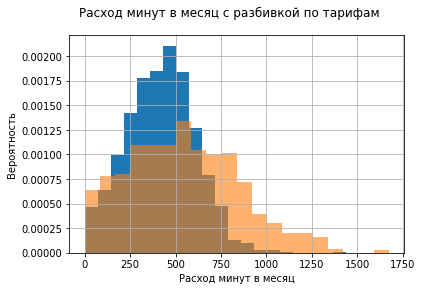

In [111]:
smart['calls_dur_sum'].hist(density=True, bins=20);
ultra['calls_dur_sum'].hist(density=True, bins=20, alpha=0.6);
plt.suptitle("Расход минут в месяц с разбивкой по тарифам ");
plt.xlabel('Расход минут в месяц');
plt.ylabel('Вероятность');

<font color=blue> Пользователи тарифа smart любят ходить по лезвию ножа и укладываются аккурат в 500 минут разговора. Но есть вероятность и превысить лимит. Пользователи тарифа ultra чувствуют себя более комфортно и имеют более широкое распределение.
</font>

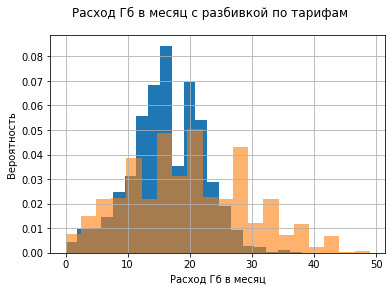

In [112]:
smart['gb_sum'].hist(density=True, bins=20);
ultra['gb_sum'].hist(density=True, bins=20, alpha=0.6);
plt.suptitle("Расход Гб в месяц с разбивкой по тарифам ");
plt.xlabel('Расход Гб в месяц');
plt.ylabel('Вероятность');

<font color=blue> И здесь пользователи тарифа ultra имеют более широкое распределение. На более дешевом тарифе часто не укладываются в лимит 15 Гб и дают компании доп. выручку)
</font>

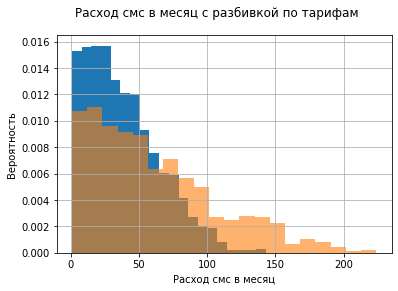

In [113]:
smart['sms_count'].hist(density=True, bins=20);
ultra['sms_count'].hist(density=True, bins=20, alpha=0.6);
plt.suptitle("Расход смс в месяц с разбивкой по тарифам ");
plt.xlabel('Расход смс в месяц');
plt.ylabel('Вероятность');

<font color=blue> По смс гистограмма скошена вправо. Большинство пользователей укладываются в лимит 50 смс. Даже пользователи тарифа ultra не сильно их жалуют, хотя распределение у них и шире.
</font>

<div class="alert alert-danger">
<h2> Комментарий от ревьюера </h2>

Ты посмотрела на средние значения. Это важная и полезная информация, безусловно. Однако здесь также важно посмотреть на данные полностью. Т.е вывести распределения кол-ва смс, которые отсылают все пользователи, по тарифам конечно же и т.д.. Описать распределения. С твоими навыками, думаю, это не составит труда

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера v2 </h2>

Отличные графики, в конце блока я бы еще добавил вывод, какой из тарифов выгоднее для пользователей, а какой для компании

</div>

### Шаг 4. Проверка гипотез <a name="p4"></a>

***Гипотеза 1: средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.***

Имеем две генеральных совокупности: по тарифу smart и тарифу ultra.

Выдвенем нулевую гипотезу о равенсте средней выручки пользователей тарифов.

Тогда альтернатиной гипотизой будем считать мнение, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind (array1, array2). 



<div class="alert alert-success">
<h2> Комментарий ревьюера </h2>

Отлично, гипотезы сформулированы правильно

</div>

In [114]:
alpha = 0.05 

results = st.ttest_ind(
    ultra['revenue_all'], 
    smart['revenue_all'])

print('p-значение: ', results.pvalue)  

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  1.4229814360764067e-160
Отвергаем нулевую гипотезу


<font color=blue> Рассчитаем дисперсию по тарифам.
</font>

In [115]:
print('Дисперсия по доходу ultra',np.var(ultra['revenue_all'], ddof=1).round(2))
print('Дисперсия по доходу smart',np.var(smart['revenue_all'], ddof=1).round(2))

Дисперсия по доходу ultra 141516.75
Дисперсия по доходу smart 669785.71


<font color=blue> Поскольку дисперсия кратно отличается, предположим, что в equal_var нужно использовать параметр False. Проверим результат.
</font>

<div class="alert alert-success">
<h2> Комментарий ревьюера v2 </h2>

Отличная работа, приятно, что добавила и не оставила без внимания)

</div>

In [116]:
alpha = 0.05 

results = st.ttest_ind(
    ultra['revenue_all'], 
    smart['revenue_all'], equal_var = False)

print('p-значение: ', results.pvalue)  

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


<font color=blue> Получили еще более мелкое число.
</font>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

У тебя отличная работа и я хочу, чтобы она стала еще лучше. Поэтому, прежде чем произвести проверку гипотезы через T-критерий Стьюдента произведи проверку дисперсии выборок, чтобы понять с каким параметром `equal_var` использовать метод проверки `ttest_ind` (по дефолту True). Здесь можно вручную посчитать [дисперсии](https://numpy.org/doc/stable/reference/generated/numpy.var.html) (обрати внимание на параметр `ddof`), либо воспользоваться [стат.тестом Левене](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html) (там в конце есть неплохой пример) или [тестом Барлетта](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bartlett.html). В чем разница в тестах, думаю ты разберешься 🙂

</div>

Получили ничтожно малое число и отвергли нулевую гипотизу.

Делаем вывод, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается не только в нашей выборке.

Проверим среднюю выручку по выборке.

In [117]:
print('Средняя выручка по тарифу ultra:',ultra['revenue_all'].mean().round(2),'рублей')
print('Средняя выручка по тарифу smart:',smart['revenue_all'].mean().round(2),'рублей')

Средняя выручка по тарифу ultra: 2070.15 рублей
Средняя выручка по тарифу smart: 1289.97 рублей


Логично, тариф ultra приносит больший совокупный доход - абонентская плата же выше.

Ради интереса посчитаем среднюю сумму дохода за вычетом абонентской платы, то есть по доп. расходам пользователей за рамками включенных в тариф лимитов.

In [118]:
print('Средняя доп. выручка по тарифу ultra:',ultra['revenue_add'].mean().round(2),'рублей')
print('Средняя доп. выручка по тарифу smart:',smart['revenue_add'].mean().round(2),'рублей')

Средняя доп. выручка по тарифу ultra: 120.15 рублей
Средняя доп. выручка по тарифу smart: 739.97 рублей


А вот за рамками тарифа больше дохода компания получает от пользователей тарифа smart.

***Гипотеза 2: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.***

Выдвенем нулевую гипотезу, что средняя выручка пользователей из Москвы и из других регионов одинакова.

Тогда альтернативной гипотезой будем считать предположение, средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Создадим срезы пользователей по Москве и регионам.

In [119]:
moscow = df.query('city == "Москва"')
region = df.query('city != "Москва"')

Для проверки нулевой гипотезы применим метод scipy.stats.ttest_ind.

In [120]:
alpha = 0.05 

results = st.ttest_ind(
    moscow['revenue_all'], 
    region['revenue_all'])

print('p-значение: ', results.pvalue)  

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Таким образом, нельзя утверждать, что средняя выручка пользователей из Москы и других регионов отличается во всей генеральной совокупности.

Найдем среднюю выручку по нашей выборке.

In [121]:
print('Средняя выручка по Москве:',moscow['revenue_all'].mean().round(2),'рублей')
print('Средняя выручка по регионам:',region['revenue_all'].mean().round(2),'рублей')

Средняя выручка по Москве: 1546.71 рублей
Средняя выручка по регионам: 1524.94 рублей


Действительно, можно сказать, что выручка от пользователей из Москвы и других регионов примерно одинаковая.

### Шаг 5. Общий вывод исследования <a name="p5"></a>

В ходе исследования были проанализированы данные по 500 пользователям компании Мегалайн за 2018 год.

Произведена группировка данных помесячно по пользователям для расчета ежемесячного дохода.

Найдены дисперсия и стандартное отклонение по звонкам, мб и смс.

Сделан вывод, что пользователи тарифа ultra активнее пользуются услугами по всем параметрам. Однако пользователи тарифа smart чаще выходят за рамки установленных тарифом лимитов и приносят дополнительный доход.

Была выдвинута гипотеза, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различается. Гипотеза была подтверждена. 

Также было сделано предположение, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов. Предположение не нашло своего подтверждения, т.к не получилось отвергнуть нулевую гипотезу. Как ни странно, расходы на связь в Москве и регионах плюс/минус одинаковые.

Таким образом, коммерческому отделу выгоднее продвигать тариф ultra, т.к. он приносит больший стабильный доход. Но и про тариф smart забывать не стоит). <font color=blue>Средний пользователь Ultra приносит компании больше денег, но из-за того, что пользователей тарифа Smart больше, то выручка от этого тарифа тоже больше.


Спасибо за ревью и все пометки, очень ценно!</font>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

С последним выводом не совсем согласен, правильнее будет сказать что средний пользователь Ultra приносит компании больше денег, но из-за того, что пользователей тарифа Smart больше, то выручка от этого тарифа тоже больше

</div>

<div class="alert alert-warning">
<h2> Комментарий ревьюера </h2>

Вывод в целом хорош, но я бы рекомендовал больше уходить от описания того, что ты сделала, к описанию того, что ты получила, какие нашла инсайды и что рекомендуешь. В целом важно и то и то, но акцент необходимо делать на последнее

</div>

<div style="border:solid purple 2px; padding: 20px">

Работа выполнена на очень высоком уровне, ты хорошо используешь собственные функции, отлично визуализируешь распределения, на каждом шаге аргументируешь свой выбор. Мне понравился твой очень вдумчивый подход к работе.

Остались небольшие доработки:

- В шаге 2 необходимо добавить округление значений;
- В шаге 2 необходимо исправить подсчет выручки от доп-го использования интернета;
- В шаге 3 необходимо дополнить анализ, построить по всем данным гистограммы и т.д;

Я уверен, ты легко справишься с доработками, жду твоих исправлений 😊

<div>